<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Does Inflation affect <br> <br> <br> the Cost of Labor </p><br><br>
**by Charan Sridhar**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
inflation_data = pd.read_csv("/Users/charan/Documents/UC_San_Diego_Data_Science_Course/Final_Project/Inflation(CPI)(7_21_22).csv")
wage_data = pd.read_csv("/Users/charan/Documents/UC_San_Diego_Data_Science_Course/Final_Project/Unit_Labour_Costs(7_21_22).csv")

**I will now be exploring the data to get a better understanding of the datasets**

In [4]:
inflation_data.head()



,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195,NaN


In [5]:
inflation_data.shape

(289821, 8)

In [19]:
a_infl = inflation_data["LOCATION"].str.contains("OECD")
b_infl = inflation_data["SUBJECT"].str.contains("TOT_F")
c_infl = inflation_data[a_infl]
#c_infl = c_infl[b_infl]
c_infl=c_infl[c_infl["TIME"].str.contains("1970")]
#c_infl[c_infl["MEASURE"].str.contains("AGRWTH")]
#c_infl["TIME"].max()
c_infl.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
150494,OECD,CPI,ENRG,IDX2015,A,1970,4.750443,NaN
150546,OECD,CPI,FOOD,IDX2015,A,1970,7.457944,NaN
150598,OECD,CPI,TOT,IDX2015,A,1970,7.234115,NaN
150650,OECD,CPI,TOT_FOODENRG,IDX2015,A,1970,7.495225,NaN
150702,OECDE,CPI,ENRG,IDX2015,A,1970,3.329077,NaN


In [ ]:
wage_data.head()

In [ ]:
wage_data.shape

In [ ]:
a_wage = wage_data["LOCATION"].str.contains("OECD")
b_wage = wage_data["MEASURE"].str.contains("PC_CHGPP")
c_wage = wage_data[a_wage]
c_wage = c_wage[b_wage]
c[c["MEASURE"].str.contains("AGRWTH")]
c_wage = c_wage[c_wage["FREQUENCY"].str.contains("A")]
c_wage["TIME"].min()
c_wage.head()

In [ ]:
a_wage = inflation_data["LOCATION"].str.contains("OECD")
b_wage = inflation_data["MEASURE"].str.endswith("TOT")
c_wage = inflation_data[a_wage]
#c[c["MEASURE"].str.contains("AGRWTH")]
c_wage = c_wage[c_wage["FREQUENCY"].str.contains("A")]
c_wage["TIME"].min()
c_wage

In [7]:
countries = wage_data['LOCATION'].unique().tolist()
#countries

**I will be analyzing the USA, France, Italy, and Canada**

In [8]:
def curate_wage_data(country):
    c_wage_data = wage_data[wage_data["LOCATION"].str.contains(country)]
    c_wage_data = c_wage_data[c_wage_data["MEASURE"].str.contains("PC_CHGPP")]
    c_wage_data = c_wage_data[c_wage_data["FREQUENCY"].str.contains("A")]
    c_wage_data = c_wage_data[c_wage_data["SUBJECT"].str.contains("EMP")]
    return c_wage_data

In [9]:
def curate_inflation_data(country):
    c_inflation_data = inflation_data[inflation_data["LOCATION"].str.endswith(country)]
    c_inflation_data = c_inflation_data[c_inflation_data["MEASURE"].str.endswith("AGRWTH")]
    c_inflation_data = c_inflation_data[c_inflation_data["FREQUENCY"].str.endswith("A")]
    c_inflation_data = c_inflation_data[c_inflation_data["SUBJECT"].str.endswith("TOT")]
    return c_inflation_data
    

In [10]:
def graph_wage(country):
    c_wage_data=curate_wage_data(country)
    c_inflation_data=curate_inflation_data(country)
    X = c_wage_data["TIME"].values
    Y = c_wage_data["Value"].values
    itime = c_inflation_data["TIME"].values
    wtime = c_wage_data["TIME"].values
    startpos=0
    #print(itime)
    #print(wtime)
    istart = int(itime[0])
    wstart = int(wtime[0])
    #print("istart")
    #print(istart)
    #print("wstart")
    #print(wstart)
    if(istart>wstart):
        while(wstart<istart):
            startpos+=1
            wstart+=1
            #print(wstart)
        X=X[startpos:]
        Y=Y[startpos:]
    
    #print(itime)
    #print(wtime)
    size = len(X)
    yearticks=[]
    a = int(size/7)
    for i in range(len(X)):
        if(i%a==0):
            yearticks.append(X[i])
    plt.plot(X,Y)
    #print(str(int(max(X))) +" "+ str(int(min(Y))-1) +" "+ str(int(max(Y))+1))
    plt.axis([0,(int(max(X))-int(min(X))),int(min(Y))-1,int(max(Y))+1])
    plt.xlabel("Year")
    plt.ylabel("Annual Growth Rate(%)")
    plt.title('Unit labour costs by Employee for '+country)
    plt.xticks(yearticks)
    plt.show()

In [11]:
def graph_inflation(country):
    c_inflation_data=curate_inflation_data(country)
    c_wage_data=curate_wage_data(country)
    X = c_inflation_data["TIME"].values
    Y = c_inflation_data["Value"].values
    
    itime = c_inflation_data["TIME"].values
    wtime = c_wage_data["TIME"].values
    
    startpos=0;
    istart = int(itime[0])
    wstart = int(wtime[0])
    #print("istart")
    #print(istart)
    #print("wstart")
    #print(wstart)
    if(wstart>istart):
        while(istart<wstart):
            startpos+=1
            istart+=1
            #print(istart)
        X=X[startpos:]
        Y=Y[startpos:]
    #print(itime)
    #print(wtime)
    size = len(X)
    yearticks=[]
    a = int(size/7)
    for i in range(size):
        if(i%a==0):
            yearticks.append(X[i])
    plt.plot(X,Y)
    #print(str(int(max(X))) +" "+ str(int(min(Y))-1) +" "+ str(int(max(Y))+1))
    plt.axis([0,(int(max(X))-int(min(X))),int(min(Y))-1,int(max(Y))+1])
    plt.xticks(yearticks)
    plt.xlabel("Year")
    plt.ylabel("Consumer Price Index")
    plt.title('Inflation for '+country)
    plt.show()

In [12]:
def graph_wage_vs_inflation(country):
    c_inflation_data=curate_inflation_data(country)
    c_wage_data=curate_wage_data(country)
    xtime = c_inflation_data["TIME"].values
    ytime = c_wage_data["TIME"].values
    X = c_inflation_data["Value"].values
    Y = c_wage_data["Value"].values
    startpos=0;
    xstart = int(xtime[0]);
    ystart = int(ytime[0]);
    #print(xstart)
    #print(ystart)
    if(xstart>ystart):
        while(ystart<xstart):
            #print("ystar: "+ str(ystart))
            startpos+=1
            ystart+=1
        Y=Y[startpos:]
        ytime=ytime[startpos:]
    elif(ystart>xstart):
        while(xstart<ystart):
            #print("xstart: "+str(xstart))
            startpos+=1
            xstart+=1
        X=X[startpos:]
        xtime = xtime[startpos:]
        
    #size = min(len(X),len(Y))
    #print(startpos)
    #print(X)
    #print(Y)
    #print(str(len(X))+ " "+str(len(Y)))
    print("Correlation: " + str(np.corrcoef(X,Y)[0,1]))
    plt.scatter(X,Y)
    plt.title('Unit Labour Costs vs Inflation for '+ country)
    plt.xlabel("Inflation(CPI)")
    plt.ylabel("Unit Labour Costs(Annual Growth Rate)")
    coef = np.polyfit(X,Y,1)
    poly1d_fn = np.poly1d(coef) 
    plt.plot(X,poly1d_fn(X),'--k')
    plt.show()


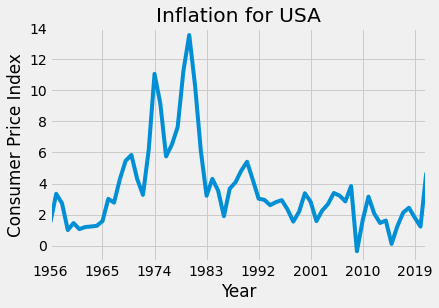

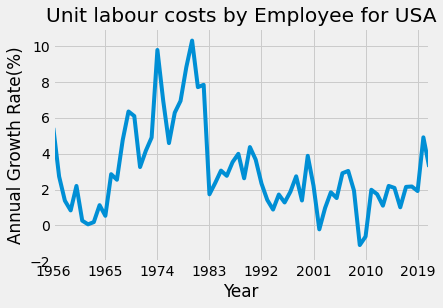

In [13]:
plt.style.use('fivethirtyeight')
graph_inflation("USA")
graph_wage("USA")

**These graphs are not identical but they share many similarities. They both have a record peak before and after 1976 with a large fall in the middle. Both dip a bit after 2008 and are going up after 2016.**

Correlation: 0.880058793353605


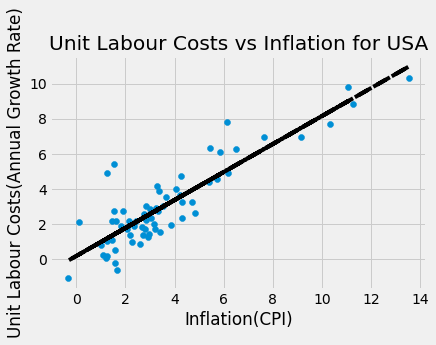

In [14]:
graph_wage_vs_inflation("USA")

**When inflation and labor costs are plotted against each other it shows a pretty strong correlation. Most of the values are clustered around the black regression line. The correlation is 0.88 which is quite high**

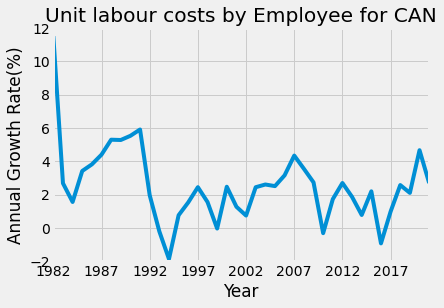

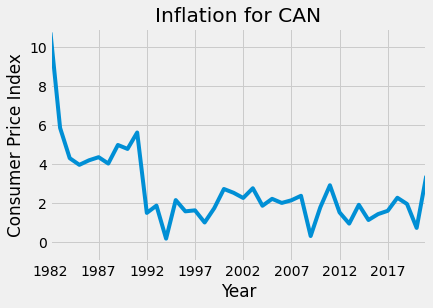

Correlation: 0.7634097475565921


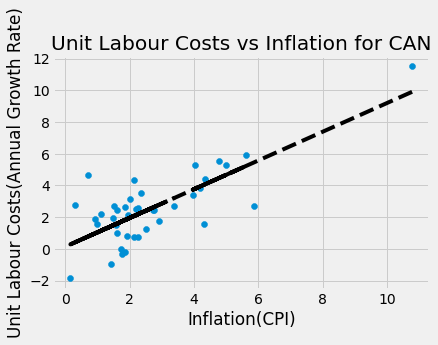

In [15]:
graph_wage("CAN")
graph_inflation("CAN")
graph_wage_vs_inflation("CAN")

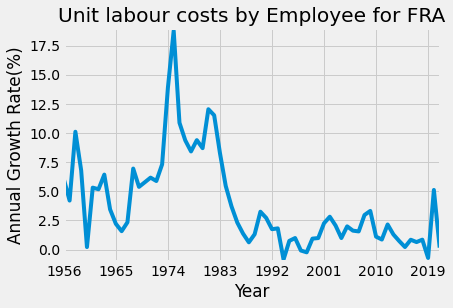

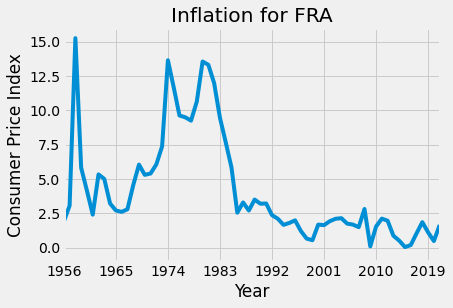

Correlation: 0.880685933231126


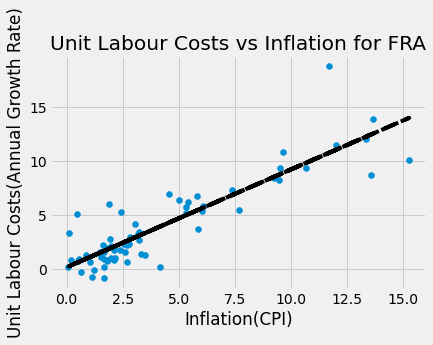

In [16]:
graph_wage("FRA")
graph_inflation("FRA")
graph_wage_vs_inflation("FRA")

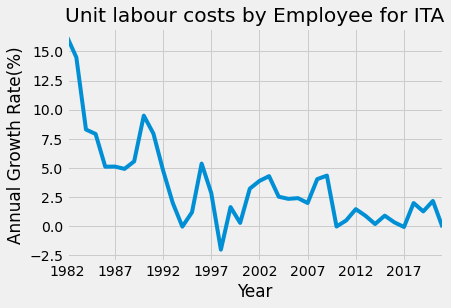

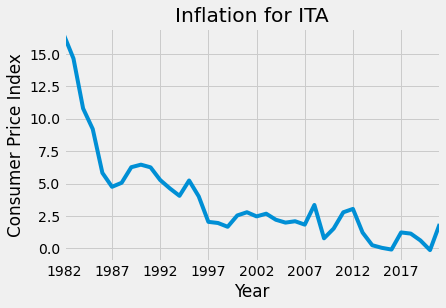

Correlation: 0.8877259424640301


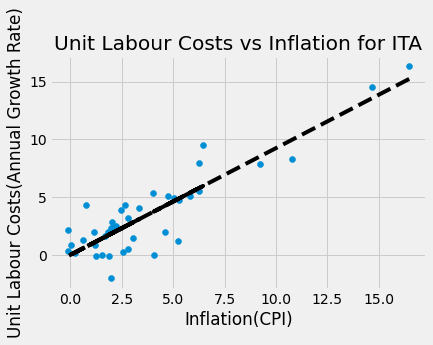

In [17]:
graph_wage("ITA")
graph_inflation("ITA")
graph_wage_vs_inflation("ITA")